In [2]:
from IPython.display import display

from __future__ import print_function

import ipywidgets as widgets
from bokeh.io import output_notebook, push_notebook
from bokeh.plotting import figure, show

d = widgets.Dropdown(options=['red', 'green', 'blue'], value='blue')


def on_value_change(change):
    r.glyph.fill_color = change['new']
    push_notebook(handle=t)
def f(x):
    print(x)

d.observe(on_value_change, names='value')

p = figure(width=250, height=250)
r = p.circle(1, 1, size=20, line_color=None)

output_notebook()

display(d)
t = show(p, notebook_handle=True)

Loading BokehJS ...

Dropdown(index=2, options=('red', 'green', 'blue'), value='blue')

In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [4]:
def f(x):
    print(x)

interact(f, x=(-10, 10, 2));

interactive(children=(IntSlider(value=0, description='x', max=10, min=-10, step=2), Output()), _dom_classes=('widget-interact',))

<IPython.core.display.Javascript object>


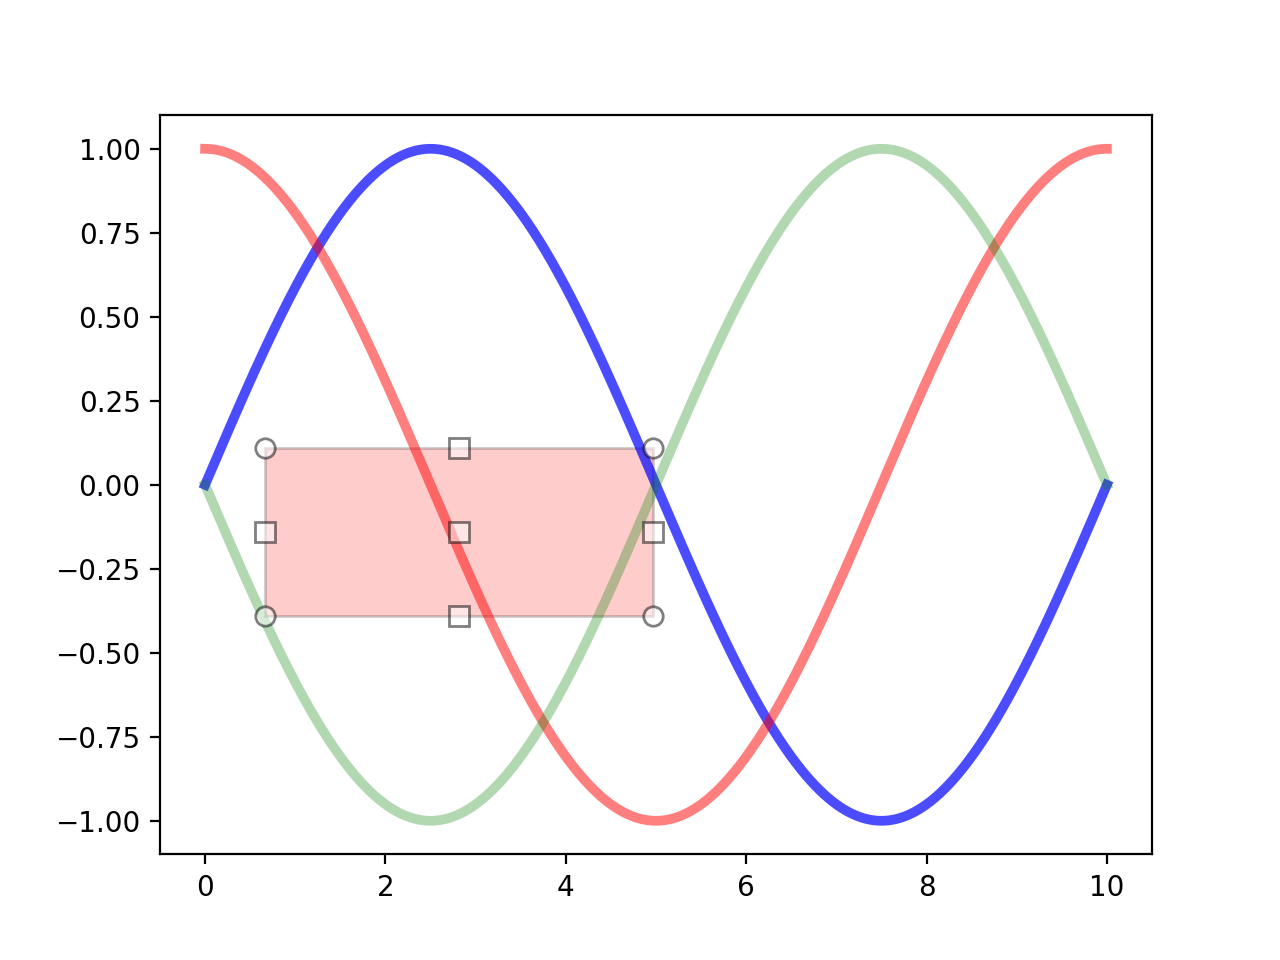


      click  -->  release


In [5]:
%matplotlib notebook

from __future__ import print_function
"""
Do a mouseclick somewhere, move the mouse to some destination, release
the button.  This class gives click- and release-events and also draws
a line or a box from the click-point to the actual mouseposition
(within the same axes) until the button is released.  Within the
method 'self.ignore()' it is checked whether the button from eventpress
and eventrelease are the same.

"""
from matplotlib.widgets import RectangleSelector
import numpy as np
import matplotlib.pyplot as plt


def line_select_callback(eclick, erelease):
    'eclick and erelease are the press and release events'
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    print("(%3.2f, %3.2f) --> (%3.2f, %3.2f)" % (x1, y1, x2, y2))
    print(" The button you used were: %s %s" % (eclick.button, erelease.button))


def toggle_selector(event):
    print(' Key pressed.')
    if event.key in ['Q', 'q'] and toggle_selector.RS.active:
        print(' RectangleSelector deactivated.')
        toggle_selector.RS.set_active(False)
    if event.key in ['A', 'a'] and not toggle_selector.RS.active:
        print(' RectangleSelector activated.')
        toggle_selector.RS.set_active(True)


fig, current_ax = plt.subplots()                 # make a new plotting range
N = 100000                                       # If N is large one can see
x = np.linspace(0.0, 10.0, N)                    # improvement by use blitting!

plt.plot(x, +np.sin(.2*np.pi*x), lw=3.5, c='b', alpha=.7)  # plot something
plt.plot(x, +np.cos(.2*np.pi*x), lw=3.5, c='r', alpha=.5)
plt.plot(x, -np.sin(.2*np.pi*x), lw=3.5, c='g', alpha=.3)

print("\n      click  -->  release")

# drawtype is 'box' or 'line' or 'none'
toggle_selector.RS = RectangleSelector(current_ax, line_select_callback,
                                       drawtype='box', useblit=True,
                                       button=[1, 3],  # don't use middle button
                                       minspanx=5, minspany=5,
                                       spancoords='pixels',
                                       interactive=True)
plt.connect('key_press_event', toggle_selector)
plt.show()